In [19]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime  # Importa datetime
pd.set_option('max_columns', None)
import regex as re
import pycountry

## MODELO PARA PREDECIR LA MIGRACIÓN NETA INGRESANDO VALORES DE AÑO E INDICADORES

En esta sección se construirá un modelo que prediga la migracion neta de un pais, ingresando el año y los indicadores correspondientes de dicho pais.
Para ello se utiliza el dataset llamado merged_df_modelo que tiene información de la migracion neta por año para todos los paises, junto con los valores de los indicadores.

In [20]:
merged_df_modelo=pd.read_csv('indicadores_modelo.csv')

In [21]:
merged_df_modelo.drop(columns='Unnamed: 0', inplace=True)

In [22]:
merged_df_modelo.isnull().sum()

Country Code                               0
Year                                       0
Ingresos                               16514
Electricidad                            9410
Contaminación                          13854
Crecimiento PBI                         4027
Crecimiento PBI per cápita              4028
Desempleo Hombre                       11961
Desempleo mujeres                       9246
Gasto PBI                              12025
Importaciones                           2634
Migracion neta                           328
Desempleados con educación avanzada    14248
Tasa de cambio                          5252
Pobreza                                15746
Mortalidad                               739
dtype: int64

In [23]:
umbral = len(merged_df_modelo.columns) * 0.7

In [24]:
merged_df_modelo_sin_80_na = merged_df_modelo.dropna(thresh=umbral)

In [25]:
merged_df_modelo_sin_80_na.shape

(3411, 16)

In [26]:
merged_df_modelo_sin_80_na.columns

Index(['Country Code', 'Year', 'Ingresos', 'Electricidad', 'Contaminación',
       'Crecimiento PBI', 'Crecimiento PBI per cápita', 'Desempleo Hombre',
       'Desempleo mujeres', 'Gasto PBI', 'Importaciones', 'Migracion neta',
       'Desempleados con educación avanzada', 'Tasa de cambio', 'Pobreza',
       'Mortalidad'],
      dtype='object')

In [27]:
merged_df_modelo_sin_80_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3411 entries, 7989 to 16491
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country Code                         3411 non-null   object 
 1   Year                                 3411 non-null   int64  
 2   Ingresos                             233 non-null    float64
 3   Electricidad                         3404 non-null   float64
 4   Contaminación                        1690 non-null   float64
 5   Crecimiento PBI                      3409 non-null   float64
 6   Crecimiento PBI per cápita           3409 non-null   float64
 7   Desempleo Hombre                     3033 non-null   float64
 8   Desempleo mujeres                    3365 non-null   float64
 9   Gasto PBI                            2898 non-null   float64
 10  Importaciones                        3398 non-null   float64
 11  Migracion neta            

## REALIZAR IMPUTACION DE VALORES FALTANTES CON KNN

In [28]:
from sklearn.impute import KNNImputer



# Columnas a imputar son las siguientes
columns_to_impute = ['Ingresos', 'Electricidad', 'Contaminación', 'Crecimiento PBI', 'Crecimiento PBI per cápita', 
                     'Desempleo Hombre', 'Desempleo mujeres', 'Gasto PBI', 'Importaciones', 
                     'Desempleados con educación avanzada', 'Tasa de cambio', 'Pobreza','Mortalidad']

# Copiar el DataFrame original para no modificarlo directamente
merged_df_modelo_sin_80_na_imputed = merged_df_modelo_sin_80_na.copy()

# Crear una instancia de KNNImputer
imputer = KNNImputer(n_neighbors=5)  # Elige el número de vecinos que deseas considerar

# Ajustar y transformar los datos utilizando KNNImputer
merged_df_modelo_sin_80_na_imputed[columns_to_impute] = imputer.fit_transform(merged_df_modelo_sin_80_na_imputed[columns_to_impute])



In [29]:
merged_df_modelo_sin_80_na_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3411 entries, 7989 to 16491
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country Code                         3411 non-null   object 
 1   Year                                 3411 non-null   int64  
 2   Ingresos                             3411 non-null   float64
 3   Electricidad                         3411 non-null   float64
 4   Contaminación                        3411 non-null   float64
 5   Crecimiento PBI                      3411 non-null   float64
 6   Crecimiento PBI per cápita           3411 non-null   float64
 7   Desempleo Hombre                     3411 non-null   float64
 8   Desempleo mujeres                    3411 non-null   float64
 9   Gasto PBI                            3411 non-null   float64
 10  Importaciones                        3411 non-null   float64
 11  Migracion neta            

In [30]:
merged_df_modelo_sin_80_na_imputed.head(3)

,Country Code,Year,Ingresos,Electricidad,Contaminación,Crecimiento PBI,Crecimiento PBI per cápita,Desempleo Hombre,Desempleo mujeres,Gasto PBI,Importaciones,Migracion neta,Desempleados con educación avanzada,Tasa de cambio,Pobreza,Mortalidad
7989,ARG,1990,10.840,92.1548,99.606700,-2.467214,-3.877390,7.13,27.4572,10.325440,4.076000e+09,6021.0,23.936,0.487589,29.74,7.743
7993,AUS,1990,18.524,100.0000,31.883404,3.576486,2.054794,6.74,22.8596,21.815482,4.198500e+10,95996.0,20.622,1.281057,26.88,7.000
7994,AUT,1990,15.520,100.0000,99.655570,4.345641,3.553548,3.02,22.7724,35.591270,4.914600e+10,59606.0,21.880,11.369833,30.50,10.800


In [31]:
# Ordenar el DataFrame por la columna 'Year'
merged_df_modelo_sin_80_na_imputed.sort_values('Year', inplace=True)

# Restablecer el índice
merged_df_modelo_sin_80_na_imputed.reset_index(drop=True, inplace=True)

## PRIMER AJUSTE CON BAGGINGREGRESSOR

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar las filas con valores nulos en la columna objetivo 'Migracion neta'
merged_df_modelo_sin_80_na_imputed.dropna(subset=['Migracion neta'], inplace=True)


# Definir tus características y etiquetas
X = merged_df_modelo_sin_80_na_imputed.drop(['Migracion neta'], axis=1)  # Características excepto 'Migracion neta' y 'Country Code'
y = merged_df_modelo_sin_80_na_imputed['Migracion neta']  # Etiquetas

merged_df_modelo_sin_80_na_imputed.reset_index(drop=True, inplace=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X = pd.get_dummies(X, columns=['Country Code'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=0)

# Crear un modelo BaggingRegressor
bagging_model = BaggingRegressor(random_state=0)

# Entrenar el modelo
bagging_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = bagging_model.predict(X_test)



In [69]:

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [34]:
mse

43975534805.57854

In [35]:
r2

0.8691065233538974

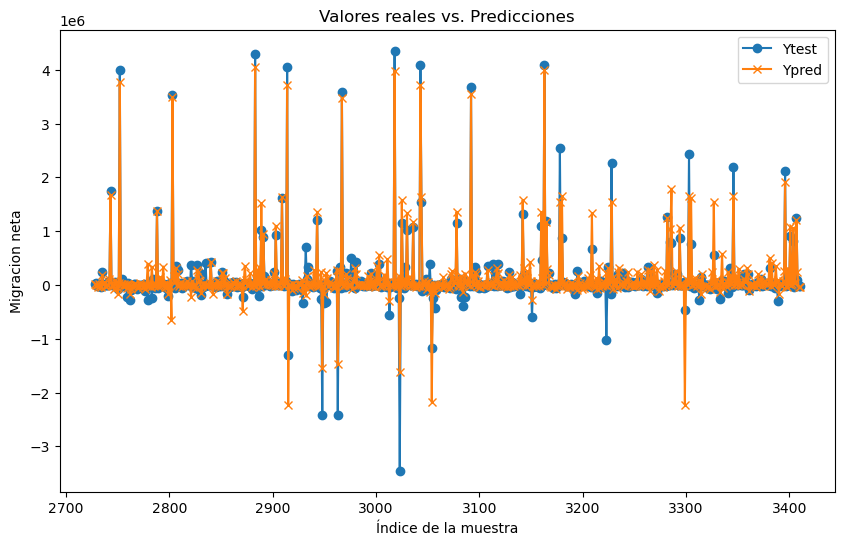

In [36]:
# Graficar Ytest y Ypred
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Ytest', marker='o')
plt.plot(y_test.index, y_pred, label='Ypred', marker='x')
plt.xlabel('Índice de la muestra')
plt.ylabel('Migracion neta')
plt.title('Valores reales vs. Predicciones')
plt.legend()
plt.show()

## MODELO PARA PREDECIR STOCK DE MIGRANTES INGRESANDO PAIS DE ORIGEN, PAIS DE DESTINO E INDICADORES DE AMBOS

En esta sección se construirá un modelo que prediga la cantidad de migrantes que existe entre dos paises, ingresando el año, pais destino, pais origen e indicadores de ambos paises. 
Para ello se utiliza el dataset llamado Stock_migrantes que tiene información de cantidade de migrantes para pares de pais origen y destino, jutno con los indicadores de cada pais involucrado en el flujo.

In [38]:
Stock_migrantes=pd.read_csv('stock_migrantes_modelo.csv')

In [39]:
Stock_migrantes.head(3)

,Unnamed: 0,Destination,Notes of destination,Location code of destination,ISO3_dest,Type of data of destination,Origin,Location code of origin,ISO3_origin,Year,Migrant stock
0,0,Burundi,NaN,108,BDI,B R,Democratic Republic of the Congo,180,COD,1990,36654
1,1,Burundi,NaN,108,BDI,B R,France*,250,FRA,1990,321
2,2,Burundi,NaN,108,BDI,B R,Kenya,404,KEN,1990,186


In [40]:
Stock_migrantes.drop(columns='Unnamed: 0',inplace=True)

## uniones para llegar a dataset final

In [41]:
# Primera unión con las claves (left Country Code rigth ISO3_origin, Year)
merged_df_modelo_stock1 = pd.merge(Stock_migrantes, merged_df_modelo, left_on=['ISO3_origin', 'Year'], right_on=['Country Code', 'Year'], how='left')

# Segunda unión con las claves (Year, left Country Code, rigth ISO3_dest)
final_merged_df = pd.merge(merged_df_modelo_stock1, merged_df_modelo, left_on=['Year', 'ISO3_dest'], right_on=['Year', 'Country Code'], suffixes=('_origin', '_dest'), how='left')

In [42]:
final_merged_df.head(3)

,Destination,Notes of destination,Location code of destination,ISO3_dest,Type of data of destination,Origin,Location code of origin,ISO3_origin,Year,Migrant stock,Country Code_origin,Ingresos_origin,Electricidad_origin,Contaminación_origin,Crecimiento PBI_origin,Crecimiento PBI per cápita_origin,Desempleo Hombre_origin,Desempleo mujeres_origin,Gasto PBI_origin,Importaciones_origin,Migracion neta_origin,Desempleados con educación avanzada_origin,Tasa de cambio_origin,Pobreza_origin,Mortalidad_origin,Country Code_dest,Ingresos_dest,Electricidad_dest,Contaminación_dest,Crecimiento PBI_dest,Crecimiento PBI per cápita_dest,Desempleo Hombre_dest,Desempleo mujeres_dest,Gasto PBI_dest,Importaciones_dest,Migracion neta_dest,Desempleados con educación avanzada_dest,Tasa de cambio_dest,Pobreza_dest,Mortalidad_dest
0,Burundi,NaN,108,BDI,B R,Democratic Republic of the Congo,180,COD,1990,36654,COD,NaN,NaN,100.000000,-6.568311,-9.584213,NaN,NaN,NaN,1.739000e+09,183750.0,NaN,2.394748e-09,NaN,16.833,BDI,NaN,NaN,100.0,3.499822,1.421896,0.72,NaN,NaN,231000000.0,-39996.0,NaN,171.255417,NaN,19.067
1,Burundi,NaN,108,BDI,B R,France*,250,FRA,1990,321,FRA,NaN,100.0,99.774451,2.923935,2.430247,7.17,NaN,38.949132,2.344360e+11,11404.0,NaN,5.445275e+00,NaN,9.300,BDI,NaN,NaN,100.0,3.499822,1.421896,0.72,NaN,NaN,231000000.0,-39996.0,NaN,171.255417,NaN,19.067
2,Burundi,NaN,108,BDI,B R,Kenya,404,KEN,1990,186,KEN,NaN,NaN,100.000000,4.192051,0.708230,NaN,NaN,NaN,2.223000e+09,-11341.0,NaN,2.291477e+01,NaN,9.310,BDI,NaN,NaN,100.0,3.499822,1.421896,0.72,NaN,NaN,231000000.0,-39996.0,NaN,171.255417,NaN,19.067


In [43]:
final_merged_df.columns

Index(['Destination', 'Notes of destination', 'Location code of destination',
       'ISO3_dest', 'Type of data of destination', 'Origin',
       'Location code of origin', 'ISO3_origin', 'Year', 'Migrant stock',
       'Country Code_origin', 'Ingresos_origin', 'Electricidad_origin',
       'Contaminación_origin', 'Crecimiento PBI_origin',
       'Crecimiento PBI per cápita_origin', 'Desempleo Hombre_origin',
       'Desempleo mujeres_origin', 'Gasto PBI_origin', 'Importaciones_origin',
       'Migracion neta_origin', 'Desempleados con educación avanzada_origin',
       'Tasa de cambio_origin', 'Pobreza_origin', 'Mortalidad_origin',
       'Country Code_dest', 'Ingresos_dest', 'Electricidad_dest',
       'Contaminación_dest', 'Crecimiento PBI_dest',
       'Crecimiento PBI per cápita_dest', 'Desempleo Hombre_dest',
       'Desempleo mujeres_dest', 'Gasto PBI_dest', 'Importaciones_dest',
       'Migracion neta_dest', 'Desempleados con educación avanzada_dest',
       'Tasa de cambio_des

In [45]:
final_modelo_stock=final_merged_df[['Destination',
       'ISO3_dest','Origin', 'ISO3_origin', 'Year', 'Migrant stock',
       'Ingresos_origin', 'Electricidad_origin',
       'Contaminación_origin', 'Crecimiento PBI_origin',
       'Crecimiento PBI per cápita_origin', 'Desempleo Hombre_origin',
       'Desempleo mujeres_origin', 'Gasto PBI_origin', 'Importaciones_origin',
       'Desempleados con educación avanzada_origin',
       'Tasa de cambio_origin', 'Pobreza_origin', 'Mortalidad_origin',
       'Ingresos_dest', 'Electricidad_dest',
       'Contaminación_dest', 'Crecimiento PBI_dest',
       'Crecimiento PBI per cápita_dest', 'Desempleo Hombre_dest',
       'Desempleo mujeres_dest', 'Gasto PBI_dest', 'Importaciones_dest',
       'Desempleados con educación avanzada_dest',
       'Tasa de cambio_dest', 'Pobreza_dest', 'Mortalidad_dest']]

In [46]:
umbral_stock = len(merged_df_modelo.columns) * 0.7

In [47]:
final_modelo_stock_sin_80_na = fina_modelo_stock.dropna(thresh=umbral)

In [48]:
final_modelo_stock_sin_80_na.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63817 entries, 0 to 64077
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Destination                                 63817 non-null  object 
 1   ISO3_dest                                   63817 non-null  object 
 2   Origin                                      63817 non-null  object 
 3   ISO3_origin                                 63817 non-null  object 
 4   Year                                        63817 non-null  int64  
 5   Migrant stock                               63817 non-null  int64  
 6   Ingresos_origin                             5402 non-null   float64
 7   Electricidad_origin                         54658 non-null  float64
 8   Contaminación_origin                        51932 non-null  float64
 9   Crecimiento PBI_origin                      59112 non-null  float64
 10  Crecimient

In [52]:
# columnas a imputar son las siguientes
columns_to_impute = ['Ingresos_origin', 'Electricidad_origin',
       'Contaminación_origin', 'Crecimiento PBI_origin',
       'Crecimiento PBI per cápita_origin', 'Desempleo Hombre_origin',
       'Desempleo mujeres_origin', 'Gasto PBI_origin', 'Importaciones_origin',
       'Desempleados con educación avanzada_origin', 'Tasa de cambio_origin',
       'Pobreza_origin', 'Mortalidad_origin', 'Ingresos_dest',
       'Electricidad_dest', 'Contaminación_dest', 'Crecimiento PBI_dest',
       'Crecimiento PBI per cápita_dest', 'Desempleo Hombre_dest',
       'Desempleo mujeres_dest', 'Gasto PBI_dest', 'Importaciones_dest',
       'Desempleados con educación avanzada_dest', 'Tasa de cambio_dest',
       'Pobreza_dest', 'Mortalidad_dest']

# Copiar el DataFrame original para no modificarlo directamente
final_modelo_stock_sin_80_na_imputed =final_modelo_stock_sin_80_na.copy()

# Crear una instancia de KNNImputer
imputer = KNNImputer(n_neighbors=5)  # Elige el número de vecinos que deseas considerar

# Ajustar y transformar los datos utilizando KNNImputer
final_modelo_stock_sin_80_na_imputed[columns_to_impute] = imputer.fit_transform(final_modelo_stock_sin_80_na_imputed[columns_to_impute])



In [53]:
final_modelo_stock_sin_80_na_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63817 entries, 0 to 64077
Data columns (total 32 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Destination                                 63817 non-null  object 
 1   ISO3_dest                                   63817 non-null  object 
 2   Origin                                      63817 non-null  object 
 3   ISO3_origin                                 63817 non-null  object 
 4   Year                                        63817 non-null  int64  
 5   Migrant stock                               63817 non-null  int64  
 6   Ingresos_origin                             63817 non-null  float64
 7   Electricidad_origin                         63817 non-null  float64
 8   Contaminación_origin                        63817 non-null  float64
 9   Crecimiento PBI_origin                      63817 non-null  float64
 10  Crecimient

In [62]:
# Ordenar el DataFrame por la columna 'Year'
final_modelo_stock_sin_80_na_imputed.sort_values('Year', inplace=True)

# Restablecer el índice
final_modelo_stock_sin_80_na_imputed.reset_index(drop=True, inplace=True)

In [63]:

# Eliminar las filas con valores nulos en la columna objetivo 'Migracion neta'
final_modelo_stock_sin_80_na_imputed.dropna(subset=['Migrant stock'], inplace=True)

# Definir features y target
X = final_modelo_stock_sin_80_na_imputed.drop(['Migrant stock','Destination','Origin'], axis=1)  # Características excepto 'Migracion neta' y 'Country Code'
y = final_modelo_stock_sin_80_na_imputed['Migrant stock']  # Etiquetas



# Dividir los datos en conjuntos de entrenamiento y prueba y hacer dummies
X = pd.get_dummies(X, columns=['ISO3_origin','ISO3_dest'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False,random_state=0)

# Crear un modelo BaggingRegressor
bagging_model = BaggingRegressor(random_state=0)

# Entrenar el modelo
bagging_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = bagging_model.predict(X_test)



In [64]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [65]:
mse

7266270465.392627

In [66]:
r2

0.7525883584581008

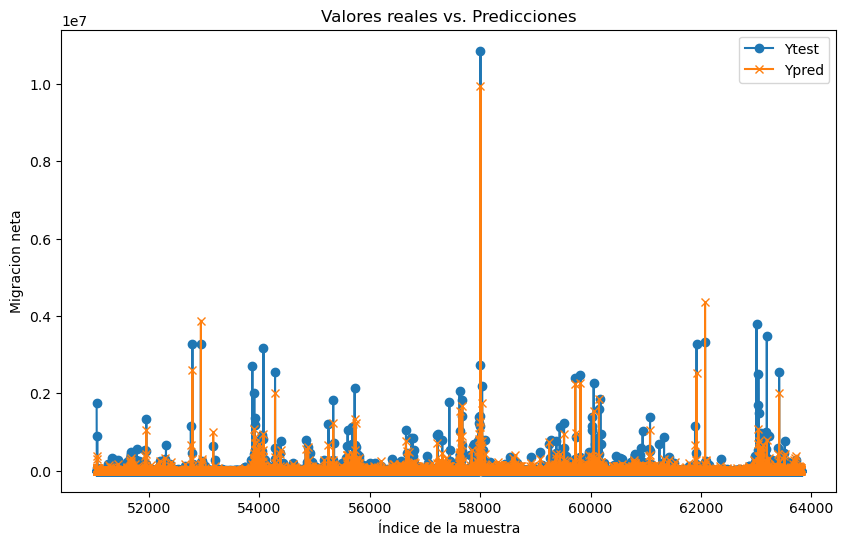

In [67]:
import matplotlib.pyplot as plt

# Graficar Ytest y Ypred
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Ytest', marker='o')
plt.plot(y_test.index, y_pred, label='Ypred', marker='x')
plt.xlabel('Índice de la muestra')
plt.ylabel('Migracion neta')
plt.title('Valores reales vs. Predicciones')
plt.legend()
plt.show()

In [79]:
from xgboost.sklearn import XGBRegressor

# Resto de tu código aquí...

# Crear un modelo XGBRegressor
xgb_model = XGBRegressor()

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = xgb_model.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación (R cuadrado)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 5705304696.738539
R-squared (R2): 0.805738197161848
